In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('eurusd.csv', parse_dates= ['Date'], index_col= 'Date')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4275 entries, 2004-01-01 to 2020-06-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   4275 non-null   float64
dtypes: float64(1)
memory usage: 66.8 KB


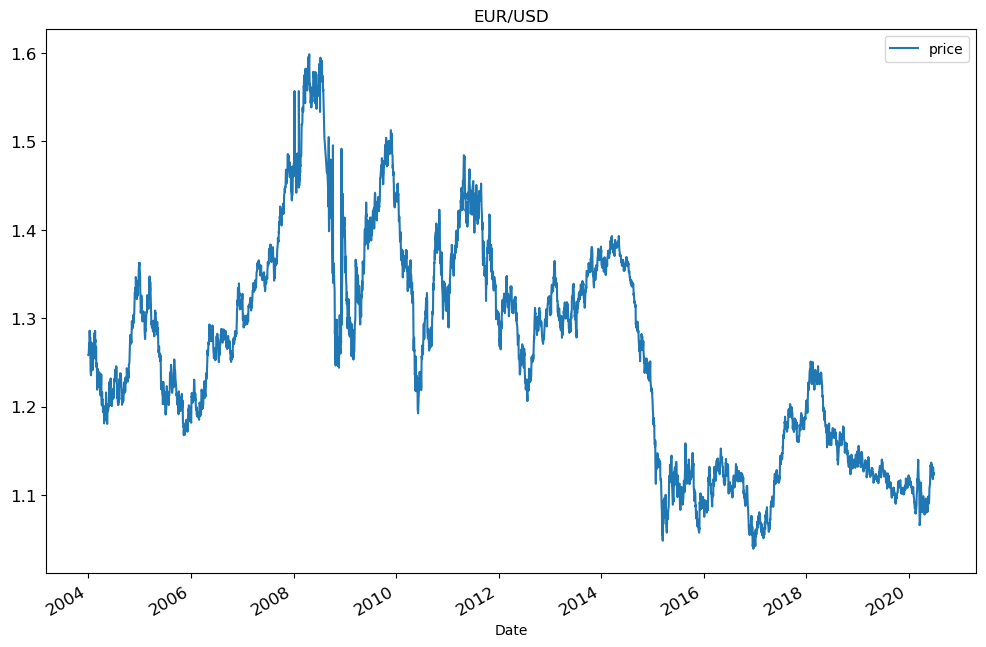

In [4]:
df.plot(figsize = (12,8), title = 'EUR/USD', fontsize = 12)
plt.show()

In [5]:
df['returns'] = np.log(df.div(df.shift(1)))

In [6]:
df

,price,returns
Date,,
2004-01-01,1.258194,NaN
2004-01-02,1.258194,0.000000
2004-01-05,1.268698,0.008313
2004-01-06,1.272103,0.002681
2004-01-07,1.264095,-0.006315
...,...,...
2020-06-24,1.131235,0.002892
2020-06-25,1.125087,-0.005449
2020-06-26,1.122208,-0.002562


# Buy and Hold Strategy

In [7]:
df.dropna(inplace = True)

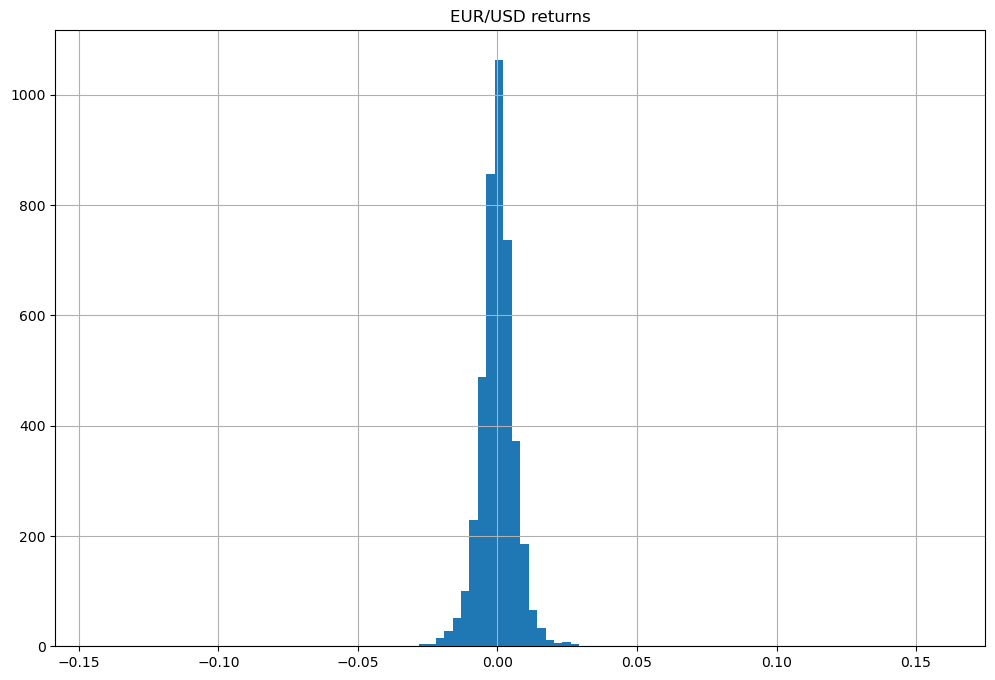

In [8]:
df.returns.hist(bins = 100, figsize= (12,8))
plt.title('EUR/USD returns')
plt.show()

In [9]:
df.returns.sum() #as returns are time additive. Amount of return generated on 1 dollar in 16 yrs

-0.11214302770699758

In [10]:
np.exp(df.returns.sum()) # price of 1 dollar invested after 16 years

0.8939163935445148

In [11]:
# another way of calculating the value of 1 dollar invested after 16 yrs
df.price[-1]/ df.price[0]

0.8939163935445141

In [12]:
df.returns.cumsum().apply(np.exp)
# cumilative value of 1 dollar for each timestamp

Date
2004-01-02    1.000000
2004-01-05    1.008348
2004-01-06    1.011055
2004-01-07    1.004690
2004-01-08    1.015343
                ...   
2020-06-24    0.899094
2020-06-25    0.894208
2020-06-26    0.891920
2020-06-29    0.892221
2020-06-30    0.893916
Name: returns, Length: 4274, dtype: float64

In [13]:
df['creturns'] = df.returns.cumsum().apply(np.exp)
df

,price,returns,creturns
Date,,,
2004-01-02,1.258194,0.000000,1.000000
2004-01-05,1.268698,0.008313,1.008348
2004-01-06,1.272103,0.002681,1.011055
2004-01-07,1.264095,-0.006315,1.004690
2004-01-08,1.277498,0.010547,1.015343
...,...,...,...
2020-06-24,1.131235,0.002892,0.899094
2020-06-25,1.125087,-0.005449,0.894208
2020-06-26,1.122208,-0.002562,0.891920


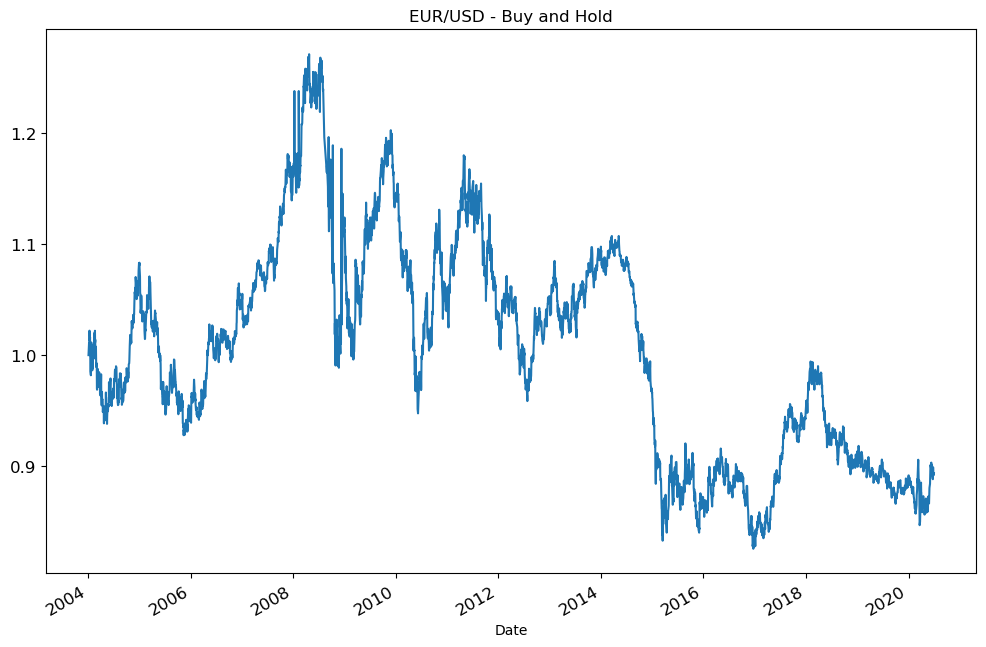

In [14]:
df.creturns.plot(figsize = (12,8), title = 'EUR/USD - Buy and Hold', fontsize = 12)
plt.show()
 # plot depicting the value of cumilative returns generated on Buy and Hold Strategy.

# Performance Metrics 

In [15]:
#absolute performance
df.creturns.iloc[-1]

0.8939163935445149

In [16]:
df.returns.sum()
#absolute returns

-0.11214302770699758

# Annualized mean returns and risk

In [17]:
df.returns.mean() * 252
#annualised returns

-0.006612083056191715

In [18]:
df.returns.std() * np.sqrt(252)
# annualized risk
# std deviation determines the risk of the instrument

0.12054120479431393

# Maximum Drawdown

In [19]:
df['cummax'] = df.creturns.cummax()

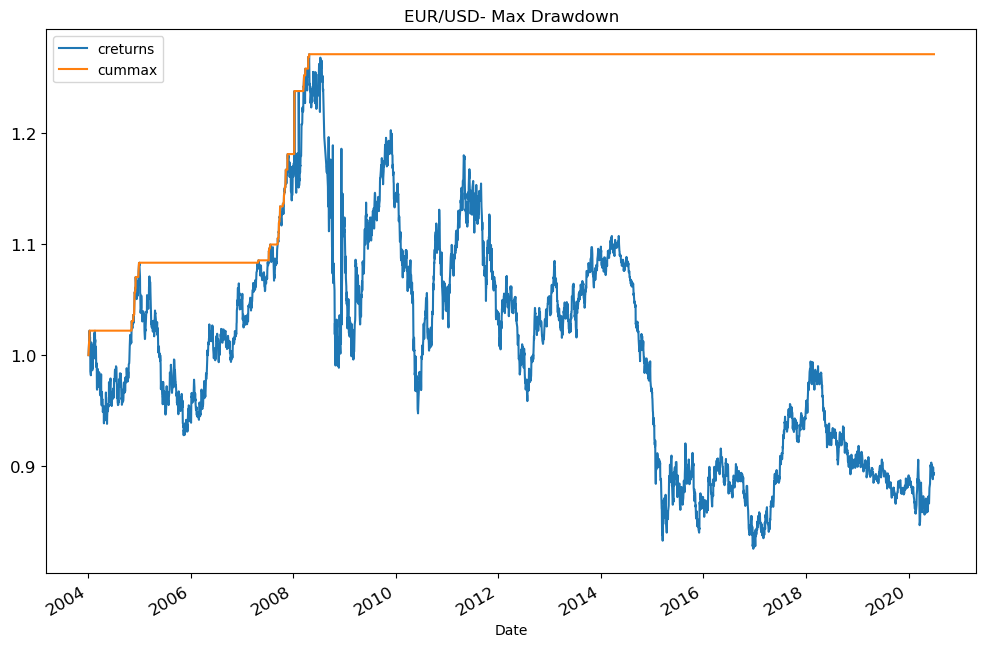

In [20]:
df[['creturns', 'cummax']].dropna().plot(figsize = (12,8), title = 'EUR/USD- Max Drawdown', fontsize = 12)
plt.show()

In [21]:
drawdown = df['cummax'] - df['creturns']
drawdown

Date
2004-01-02    0.000000
2004-01-05    0.000000
2004-01-06    0.000000
2004-01-07    0.006365
2004-01-08    0.000000
                ...   
2020-06-24    0.371615
2020-06-25    0.376500
2020-06-26    0.378788
2020-06-29    0.378488
2020-06-30    0.376792
Length: 4274, dtype: float64

In [22]:
drawdown.max()

0.4448840569933439

In [23]:
drawdown.idxmax()
# index where the drawdown is maximum.

Timestamp('2016-12-21 00:00:00')